In [22]:
import pandas as pd

In [23]:
diabetes_overfit = pd.read_csv("diabetes.csv")

In [24]:
diabetes_overfit.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [25]:
diabetes_overfit.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [26]:
diabetes_overfit['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [27]:
diabetes_overfit.drop('smoking_history', axis=1, inplace=True)


In [28]:
diabetes_overfit.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


Encode The Gender

In [29]:
diabetes_overfit['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [30]:
diabetes_overfit.groupby('gender').size()

gender
Female    58552
Male      41430
Other        18
dtype: int64

In [31]:
diabetes_overfit = diabetes_overfit[diabetes_overfit['gender'] != 'Other']

In [32]:
diabetes_overfit.groupby('gender').size()

gender
Female    58552
Male      41430
dtype: int64

In [33]:
diabetes_overfit.groupby('diabetes').size()

diabetes
0    91482
1     8500
dtype: int64

In [34]:
class_1 = diabetes_overfit[diabetes_overfit['diabetes'] == 1]
class_0 = diabetes_overfit[diabetes_overfit['diabetes'] == 0].sample(n=8500, random_state=42)
diabetes = pd.concat([class_0, class_1])
diabetes.groupby('diabetes').size()


diabetes
0    8500
1    8500
dtype: int64

In [35]:
diabetes.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
50974,Female,80.0,0,0,27.32,6.1,159,0
62503,Male,15.0,0,0,19.89,6.6,159,0
306,Female,80.0,0,1,21.30,5.0,159,0
86797,Female,25.0,0,0,27.32,4.0,130,0
3762,Male,17.0,0,0,27.24,6.2,160,0


In [36]:
# diabetes['gender'].replace(['Female','Male'],[0,1],inplace = True)

In [37]:
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()
diabetes['gender'] = lable_encoder.fit_transform(diabetes['gender'])
diabetes['gender'].unique()

array([0, 1])

In [38]:
diabetes.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
50974,0,80.0,0,0,27.32,6.1,159,0
62503,1,15.0,0,0,19.89,6.6,159,0
306,0,80.0,0,1,21.30,5.0,159,0
86797,0,25.0,0,0,27.32,4.0,130,0
3762,1,17.0,0,0,27.24,6.2,160,0


<Axes: >

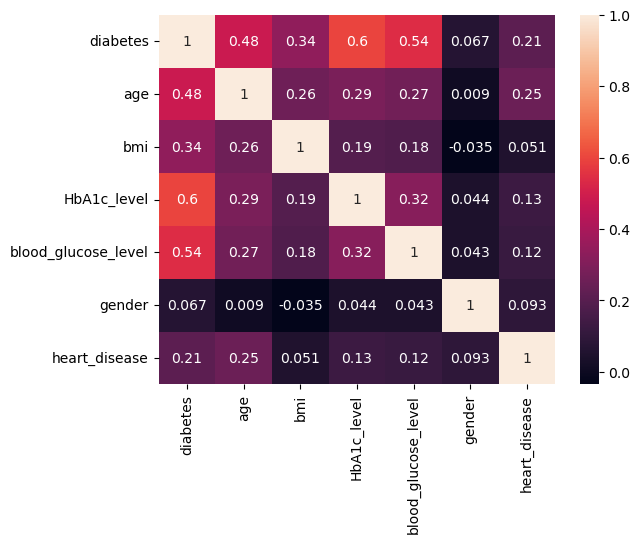

In [39]:
import seaborn as sns

sns.heatmap(diabetes[['diabetes','age','bmi','HbA1c_level','blood_glucose_level','gender','heart_disease']].corr(),annot = True)

<Axes: >

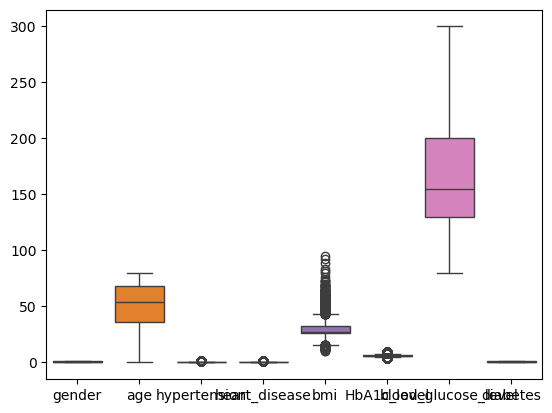

In [40]:
sns.boxplot(diabetes)

import numpy as np

# Assuming 'bmi' is the name of the column containing the BMI values in your DataFrame
bmi_values = diabetes['bmi']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(bmi_values, 25)
Q3 = np.percentile(bmi_values, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = sum((bmi_values < lower_bound) | (bmi_values > upper_bound))

print("Number of outliers in BMI feature:", outliers_count)


In [41]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 50974 to 99979
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  int32  
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   bmi                  17000 non-null  float64
 5   HbA1c_level          17000 non-null  float64
 6   blood_glucose_level  17000 non-null  int64  
 7   diabetes             17000 non-null  int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 1.1 MB


Imputing Outliers

import numpy as np

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(diabetes['bmi'], 25)
Q3 = np.percentile(diabetes['bmi'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
diabetes_cleaned = diabetes[(diabetes['bmi'] >= lower_bound) & (diabetes['bmi'] <= upper_bound)]

# Print the shape of the cleaned DataFrame to see how many outliers were removed
print("Shape of original DataFrame:", diabetes.shape)
print("Shape of cleaned DataFrame:", diabetes_cleaned.shape)


sns.boxplot(diabetes_cleaned)

In [42]:
X = diabetes.drop(['diabetes'], axis = 1)
y = diabetes['diabetes']

In [43]:
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
50974,0,80.0,0,0,27.32,6.1,159
62503,1,15.0,0,0,19.89,6.6,159
306,0,80.0,0,1,21.30,5.0,159
86797,0,25.0,0,0,27.32,4.0,130
3762,1,17.0,0,0,27.24,6.2,160


In [44]:
y.head()

50974    0
62503    0
306      0
86797    0
3762     0
Name: diabetes, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.6,random_state=42)

from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

In [46]:

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
linear_model = tf.keras.models.Sequential()
linear_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) 
linear_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
linear_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
linear_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = linear_model.fit(X_train, y_train, epochs=100, 
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])

Epoch 1/100
319/319 [==============================] - 2s 3ms/step - loss: 0.6669 - accuracy: 0.5680 - val_loss: 0.6222 - val_accuracy: 0.6132
Epoch 2/100
319/319 [==============================] - 1s 2ms/step - loss: 0.6039 - accuracy: 0.6491 - val_loss: 0.5845 - val_accuracy: 0.7182
Epoch 3/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5686 - accuracy: 0.7187 - val_loss: 0.5542 - val_accuracy: 0.7315
Epoch 4/100
319/319 [==============================] - 1s 3ms/step - loss: 0.5444 - accuracy: 0.7321 - val_loss: 0.5350 - val_accuracy: 0.7363
Epoch 5/100
319/319 [==============================] - 1s 3ms/step - loss: 0.5237 - accuracy: 0.7555 - val_loss: 0.5141 - val_accuracy: 0.7725
Epoch 6/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5030 - accuracy: 0.7827 - val_loss: 0.4943 - val_accuracy: 0.7913
Epoch 7/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4816 - accuracy: 0.7996 - val_loss: 0.4820 - val_accuracy: 0.7868

linear_model.score(X_test, y_test)

In [47]:
predict = linear_model.predict(X_test)

213/213 [==============================] - 1s 975us/step


case_predict = linear_model.predict([[0 ,20.0 ,0 ,0 ,36.96 ,6.6 ,200 ]])
print(case_predict)
if case_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

In [48]:
print(predict)

[[0.989361  ]
 [0.53610265]
 [0.9974514 ]
 ...
 [0.60175854]
 [0.00415398]
 [0.0331062 ]]


In [49]:
import pickle

#saving the model and encoder

data = {"linear_model": linear_model,"lable_encoder": lable_encoder }
with open('linear_regression_model3.pkl','wb') as file:
    pickle.dump(data,file)

INFO:tensorflow:Assets written to: ram://6e922698-8840-45c8-8e12-e86c5535e45c/assets


In [50]:
import joblib
joblib.dump(linear_model,'linear_regression_model.pkl')

INFO:tensorflow:Assets written to: ram://6423f273-140d-43ec-8ee9-988e25c70f34/assets


['linear_regression_model.pkl']

In [51]:
import tensorflow as tf
path = './model.h5'
linear_model.save(path )
loaded_model= tf.keras.models.load_model(path )
